In [1]:
import tensorflow as tf 
from tensorflow.python.platform import gfile

In [2]:
inp_array=['Input']
out_array=["output"]

In [3]:
model_path = "keypoints.tflite"
img_path = "img3.jpg"

In [4]:
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [5]:
 # Get input and output tensors.
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'images', 'index': 411, 'shape': array([  1, 160, 160,   3], dtype=int32), 'shape_signature': array([  1, 160, 160,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [6]:
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'Identity', 'index': 1, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([1, 4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 2, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([1, 3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_2', 'index': 3, 'shape': array([  1, 136], dtype=int32), 'shape_signature': array([  1, 136], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_

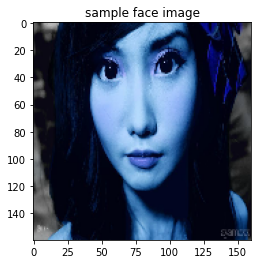

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread(img_path)
img=cv2.resize(img,(160,160))
img1=img.copy()
# img=img/255
img=[img]
img = np.concatenate([arr[np.newaxis] for arr in img])
img=img.astype("int32")
tensor_index = interpreter.get_input_details()[0]['index']
input_tensor_z= tf.convert_to_tensor(img, np.float32)
interpreter.set_tensor(tensor_index, input_tensor_z)
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[2]['index'])
landmarks=output_data
plt.imshow(img1)
plt.title("sample face image")
plt.show()

In [8]:
print("shape of output data:",output_data[0].shape)

shape of output data: (136,)


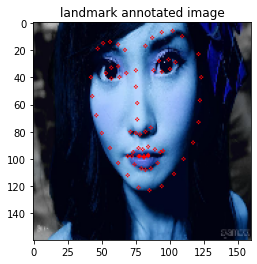

In [9]:
img1_annoted = img1.copy()
for index in range(68):
    x_index = (index)*2
    y_index = (index)*2+1
    width = img1.shape[1]
    height = img1.shape[0]
    x = int(round(output_data[0][x_index]*width))
    y = int(round(output_data[0][y_index]*height))
    color = (255, 0, 0)
    img1_annoted = cv2.circle(img1_annoted,(x,y), 1, color, 1)
plt.title("landmark annotated image")
plt.imshow(img1_annoted)